### バージョン
- CuPy:   4.0.0rc1
- Python: 3.6.4

### 音楽データ
同ディレクトリにzip形式で圧縮してあります．

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pydub
import cupy as cp

def fn(filename, format):
    cp.cuda.set_allocator(cp.cuda.MemoryPool().malloc)
    
    # 音楽データ読み込み
    data = pydub.AudioSegment.from_file(filename, format)
    
    # numpy arrayに変換
    y = data.get_array_of_samples()
    y = cp.array(y)
    
    # FFT
    yf = cp.asnumpy(cp.fft.fft(y))
    
    # グラフ出力のためのx軸計算
    rate = float(pydub.utils.mediainfo(filename)['sample_rate'])
    x = np.fft.fftfreq(len(yf), 1 / rate)

    # 出力するグラフのサイズ設定
    plt.rcParams['figure.figsize'] = (8, 6)

    # 出力するグラフのx軸の範囲設定
    plt.xlim(0, 2000)

    # グラフの表示
    plt.plot(x, np.abs(yf))
    plt.show()

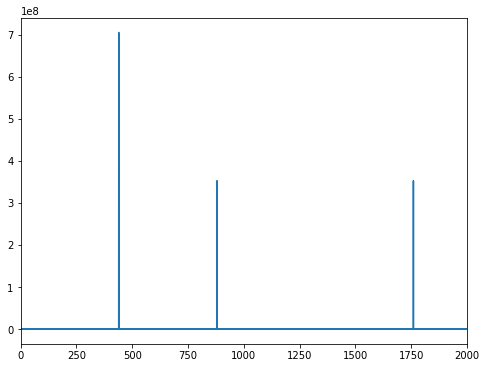

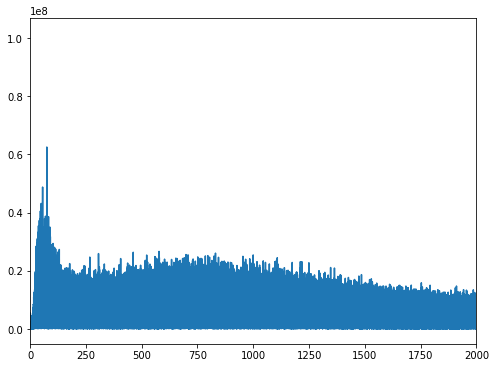

In [2]:
# 成功例
filename = 'sounds/ok.wav'
format = 'wav'
fn(filename,format)

filename = 'sounds/ok2.wav'
format = 'wav'
fn(filename, format)

In [3]:
# 失敗例
filename = 'sounds/ng.wav'
format = 'wav'
fn(filename,format)

Exception ignored in: <bound method Plan1d.__del__ of <cupy.cuda.cufft.Plan1d object at 0x7f8db4592b70>>
Traceback (most recent call last):
  File "cupy/cuda/cufft.pyx", line 101, in cupy.cuda.cufft.Plan1d.__del__
AttributeError: 'Plan1d' object has no attribute 'plan'


CuFftError: CUFFT_ALLOC_FAILED